In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

In [39]:
def get_rc_params():
    font_color = "black"
    font_size = 18
    plt.rcParams.update(
        {
            "text.color": font_color,
            "axes.labelcolor": font_color,
            "axes.labelsize": font_size,
            "axes.titleweight": "regular",
            "axes.titlesize": font_size,
            "xtick.labelcolor": font_color,
            "xtick.labelsize": font_size,
            "ytick.labelcolor": font_color,
            "ytick.labelsize": font_size,
            "font.weight": "regular",
        }
    )

    plt.rc("axes.spines", top=False, bottom=True, left=True, right=False)
    plt.rc("axes", edgecolor=font_color)

In [89]:
get_rc_params()

colors = [(0, 0, 0, 0), (1, 0, 0, .5)]  # RGBA: (R, G, B, A)
reds = ListedColormap(colors)

colors = [(0, 0, 0, 0), (0, 1, 0, .5)]  # RGBA: (R, G, B, A)
greens = ListedColormap(colors)

In [41]:
df = pd.read_csv("training_metrics.csv")

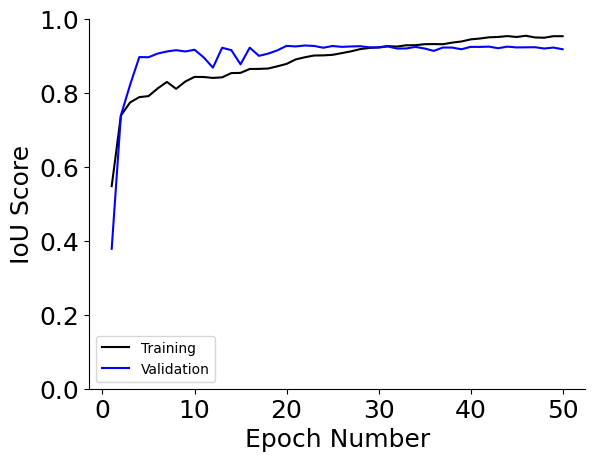

In [43]:
plt.plot(df.epoch, df.train_iou, c="black")
plt.plot(df.epoch, df.val_iou, c="blue")
plt.ylim(0,1)
plt.ylabel("IoU Score")
plt.xlabel("Epoch Number")
plt.legend(["Training", "Validation"])
plt.savefig("training_validation_iou.png")

In [72]:
images = np.load("test_images_predictions.npy", allow_pickle = True).item()

In [73]:
images.keys()

dict_keys(['images', 'masks', 'predictions'])

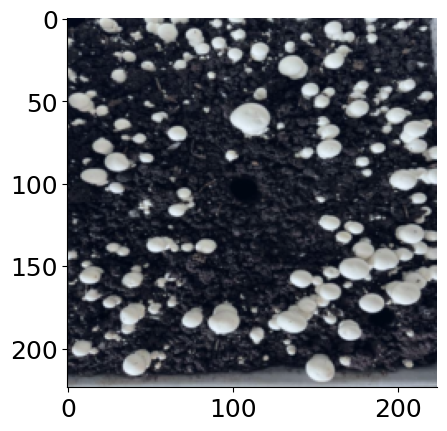

In [74]:
plt.imshow(images["images"] [0])
#plt.imshow(images["predictions"][0]>0.5, alpha =0.5)

In [75]:
images = np.load("test_images_predictions.npy", allow_pickle = True).item()

In [76]:
images.keys()

dict_keys(['images', 'masks', 'predictions'])

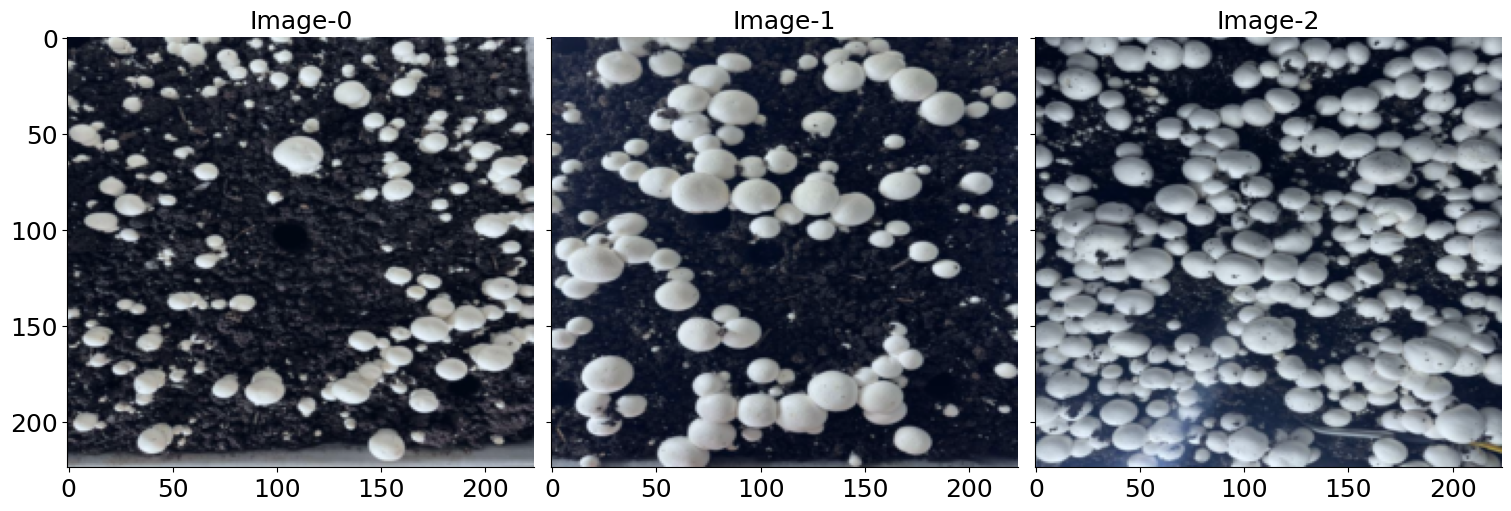

In [77]:
fig, ax = plt.subplots(1,3, constrained_layout =  True, sharey=True, figsize=(15,5))

for i,  a in enumerate(ax):
    a.imshow(images["images"] [i], aspect="auto")
    a.set_title(f"Image-{i}")

plt.savefig("images_of_mushrooms.png")

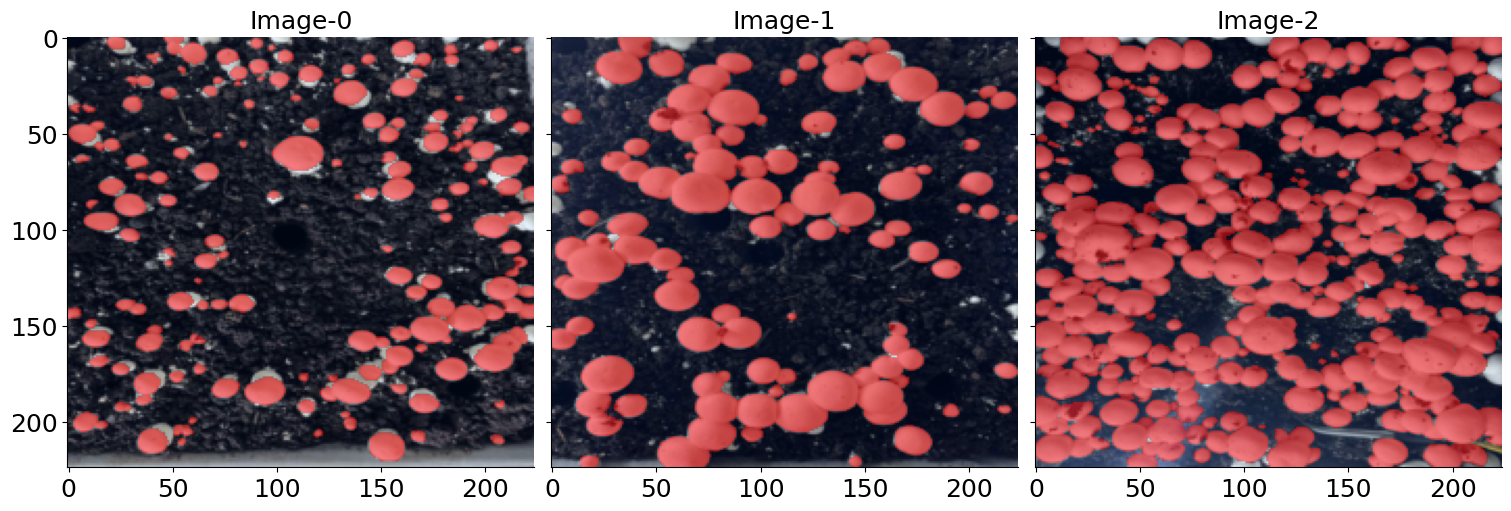

In [78]:
fig, ax = plt.subplots(1,3, constrained_layout =  True, sharey=True, figsize=(15,5))

for i,  a in enumerate(ax):
    a.imshow(images["images"] [i], aspect="auto")
    a.imshow(images["masks"] [i], aspect="auto", cmap = reds)
    a.set_title(f"Image-{i}")

plt.savefig("images_of_mushrooms_w_masks.png")

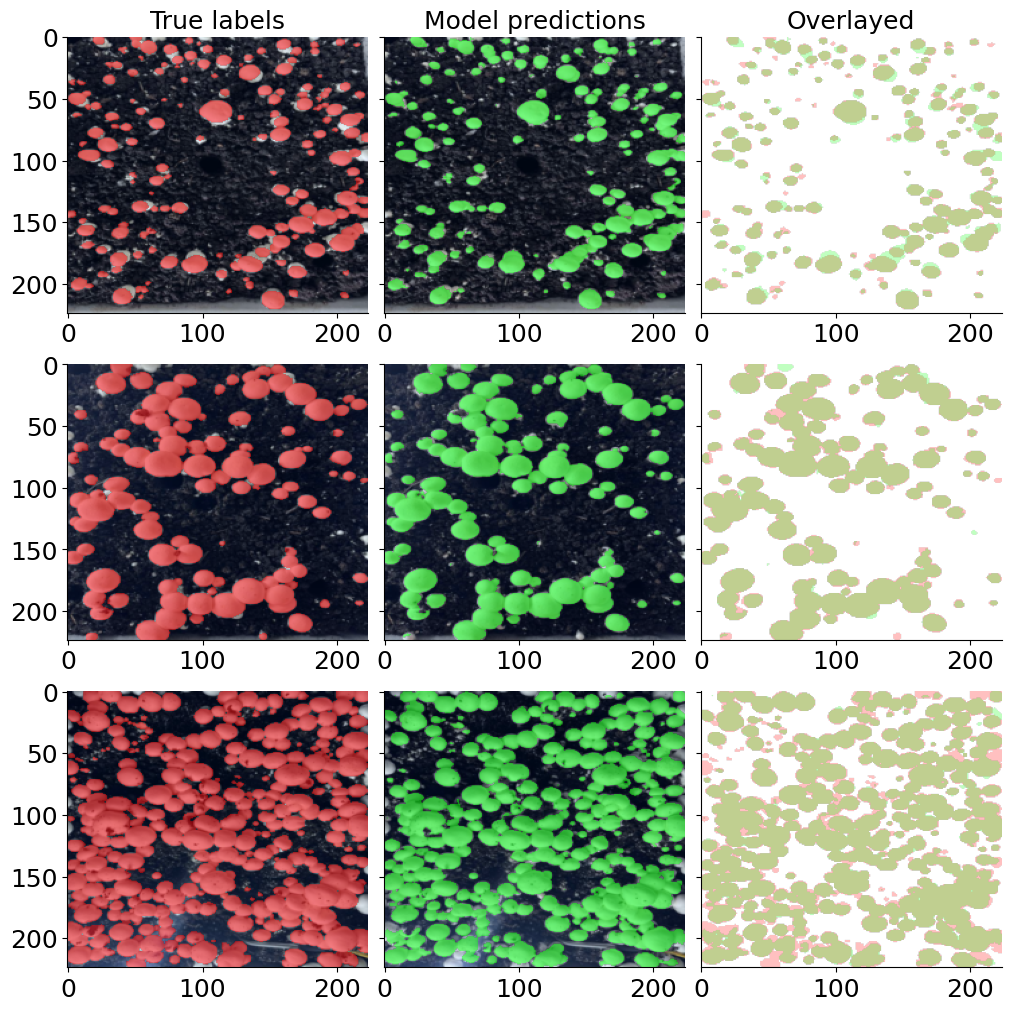

In [95]:
fig, ax = plt.subplots(3,3, constrained_layout =  True, sharey=True, figsize=(10,10))

for i in range(len(images["images"])):
    ax[i,0].imshow(images["images"] [i], aspect="auto")
    ax[i,0].imshow(images["masks"] [i], aspect="auto", cmap = reds)
    ax[i,1].imshow(images["images"] [i], aspect="auto")
    ax[i,1].imshow(images["predictions"] [i], aspect="auto", cmap = greens)
    ax[i,2].imshow(images["masks"] [i], aspect="auto", cmap = reds, alpha=0.5)
    ax[i,2].imshow(images["predictions"] [i], aspect="auto", cmap = greens, alpha=0.5)
    ax[0,1].set_title(f"Model predictions")
    ax[0,0].set_title(f"True labels")
    ax[0,2].set_title(f"Overlayed")


plt.savefig("images_of_mushrooms_w_predications.png")

In [132]:
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)
from scipy import ndimage as ndi
cells = images ["predictions"] [1] > 0.5

distance = ndi.distance_transform_edt(cells)

local_max_coords = feature.peak_local_max(distance, min_distance=3)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = measure.label(local_max_mask)

segmented_cells = segmentation.watershed(-distance, markers, mask=cells)

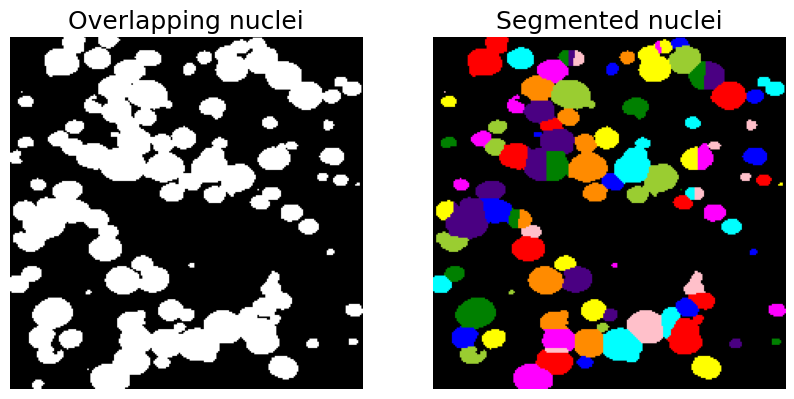

In [133]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(cells, cmap='gray')
ax[0].set_title('Overlapping nuclei')
ax[0].axis('off')
ax[1].imshow(color.label2rgb(segmented_cells, bg_label=0))
ax[1].set_title('Segmented nuclei')
ax[1].axis('off')
plt.show()

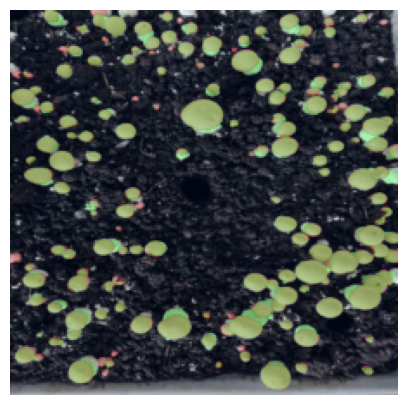

In [141]:
plt.figure(figsize = (5,5))
plt.imshow(images["images"] [0], aspect="auto")
plt.imshow(images["masks"] [0], aspect="auto", cmap = reds, alpha=0.5)
plt.imshow(images["predictions"] [0], aspect="auto", cmap = greens, alpha=0.5)
plt.axis("off")

plt.savefig("featured.png", transparent=True)